# Marketing Analytics - RFM Modelling

Dalam hal pemasaran, jika Anda mencoba berbicara dengan semua orang, Anda akan kesulitan menjangkau siapa pun. Pesan yang tidak jelas dan umum jauh lebih kecil kemungkinannya untuk beresonansi dengan audiens daripada komunikasi langsung yang spesifik - itulah sebabnya penargetan dalam pemasaran sangat penting. Pemasar yang cerdas memahami pentingnya "**Kenali Pelanggan Anda**". Bukan hanya berfokus pada menghasilkan lebih banyak transaksi, pemasar harus mengikuti perubahan paradigma dari peningkatan **CTRs (Click-Through Rates)** menjadi retensi, loyalitas, dan membangun hubungan pelanggan.

Daripada menganalisis seluruh basis pelanggan secara keseluruhan, lebih baik untuk membagi mereka menjadi kelompok homogen, memahami sifat/perilaku setiap kelompok, dan melibatkan mereka dengan kampanye bertarget yang relevan. Salah satu metode segmentasi yang paling populer, mudah digunakan, dan efektif yang memungkinkan pemasar menganalisis perilaku pelanggan adalah **RFM Analysis**.

## 1. Introduction

RFM adalah singkatan dari **Recency, Frequency, dan Monetary value**, masing-masing sesuai dengan beberapa sifat pelanggan utama. Metrik RFM ini adalah indikator penting dari perilaku pelanggan karena frekuensi dan nilai moneter memengaruhi nilai umur pelanggan, dan keterkinian memengaruhi retensi, ukuran keterlibatan.

Bisnis yang tidak memiliki aspek moneter, seperti jumlah penayangan, jumlah pembaca, atau produk yang berorientasi pada penjelajahan, dapat menggunakan parameter Keterlibatan daripada yang Moneter. Ini menghasilkan penggunaan **RFE (Recency, Frequency, Engagement)** - variasi RFM. Lebih lanjut, parameter Keterlibatan ini dapat didefinisikan sebagai nilai gabungan berdasarkan metrik seperti rasio pentalan, durasi kunjungan, jumlah halaman yang dikunjungi, waktu yang dihabiskan per halaman, dll.

Fitur RFM pelanggan menggambarkan karakteristik berikut:

- Semakin baru mereka membeli, semakin responsif mereka terhadap promosi.
- Semakin sering mereka membeli, semakin terlibat dan puas.
- Semakin banyak nilai uang membantu membedakan pembelanja tinggi vs pembelanjaan rendah.

Pada pembahasan ini, kita akan menggunakan dataset transaksi pelanggan dari sebuah e-commerce yang terdapat di Kaggle.

**Dataset Information:**

Dataset tersebut adalah data pesanan pelanggan dari e-commerce asal Brazil yaitu Olist Store. Dataset ini berisi 100.000 data dari tahun 2016-2018 yang dihimpun dari beberapa pasar yang ada di Brazil. Dataset yang digunakan dapat Anda download di link ini https://www.kaggle.com/olistbr/brazilian-ecommerce.

**Attribute Information:**

Terdapat 3 file yang digunakan antara lain:
1. `olist_customers_dataset.csv` berisi informasi tentang pelanggan dan lokasinya.
    - customer_id : key to the orders dataset, each order has a unique customer_id
    - customer_unique_id : unique identifier of a customer
    - customer_zip_code_prefix : first five digits of customer zip code
    - customer_city : customer city name
    - customer_state : customer state
    
2. `olist_orders_dataset.csv` berisi informasi tentang pesanan pelanggan.   
    - order_id : unique identifier of the order
    - customer_id : key to the customer dataset. Each order has a unique customer_id
    - order_status : reference to the order status (delivered, shipped, etc)
    - order_purchase_timestamp : shows the purchase timestamp
    - order_approved_at : shows the payment approval timestamp
    - order_delivered_carrier_date : shows the order posting timestamp. When it was handled to the logistic partner
    - order_delivered_customer_date : shows the actual order delivery date to the customer
    - order_estimated_delivery_date : shows the estimated delivery date that was informed to customer at the purchase moment   
    
3. `olist_order_items_dataset.csv` berisi informasi barang dalam setiap pesanan.
    - order_id : order unique identifier
    - order_item_id : sequential number identifying number of items included in the same order
    - product_id : product unique identifier
    - seller_id : seller unique identifier
    - shipping_limit_date : shows the seller shipping limit date for handling the order over to the logistic partner
    - price : item price
    - freight_value : item freight value item (if an order has more than one item the freight value is splitted between items)
    
Fokus pembahasan ini adalah melakukan proses pemodelan dan analisis RFM berdasarkan perilaku transaksi para pelanggannya.

## 2. Data Preprocessing

Langkah utama sebelum melakukan pemodelan/analisis adalah data preprocessing. 

Adapun yang akan dilakukan pada tahap ini antara lain:
- Import library yang dibutuhkan
- Load file ke dalam bentuk dataframe
- Menggabungkan data dan melakukan formatting data
- Mendeteksi dan mengatasi nilai kosong
- Memilih fitur yang digunakan

**Import Library**

Pada pembahasan ini library yang digunakan antara lain:
- Manipulasi Data: numpy, pandas, datetime
- Visualisasi Data : matplotlib, seaborn

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

Untuk membaca file ke dalam bentuk dataframe, akan menggunakan fungsi `pd.read_csv` karena file yang digunakan berekstensi CSV (Comma Separated Value).

In [2]:
# Load file into dataframe
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')

In [3]:
# View first five rows table customers
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# View info table customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# View first five rows table orders
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# View info table orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
# View first five rows table order_items
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
# View info table order_items
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Joining Data**

Melakukan penggabungan data dari ketiga dataset diatas menggunakan fungsi `pd.merge`.

- Left Join table orders dan items berdasarkan `order_id`
- Inner Join table customers dengan hasil join sebelumnya berdasarkan `customer_id`

In [9]:
# Joining dataframe
order_items = pd.merge(orders, items, on='order_id', how='left')
customer_orders = pd.merge(customers, order_items, on='customer_id')

# View new first five rows
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [10]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113425 non-null  object 
 1   customer_unique_id             113425 non-null  object 
 2   customer_zip_code_prefix       113425 non-null  int64  
 3   customer_city                  113425 non-null  object 
 4   customer_state                 113425 non-null  object 
 5   order_id                       113425 non-null  object 
 6   order_status                   113425 non-null  object 
 7   order_purchase_timestamp       113425 non-null  object 
 8   order_approved_at              113264 non-null  object 
 9   order_delivered_carrier_date   111457 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  113425 non-null  object 
 12  order_item_id                 

**Mengecek dan Menangani Nilai Kosong**

Kita bisa mengecek data bernilai kosong atau NULL dengan menggunakan fungsi `isnull()`

In [11]:
customer_orders.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

Hasil diatas merupakan jumlah data bernilai NULL dari setiap kolom. Kita akan asumsikan menghapus data bernilai NULL karena data transaksi tidak lengkap atau dimungkinkan pesanan belum terkirim

In [12]:
customer_orders.dropna(subset=['order_approved_at','order_delivered_carrier_date',
                               'order_delivered_customer_date'])['order_status'].value_counts()

delivered    110173
canceled          7
Name: order_status, dtype: int64

Ternyata jika kita menghapus data tersebut terlihat bahwa data bernilai NULL akibat status pemesanan yang belum terkirim. Kita bisa cek kembali data bernilai NULL yang ada. Jika `False` maka data sudah dianggap bersih. Tetapi sebelum data dihapus kita bisa melakukan ekplorasi terlebih dahulu, karena walaupun status pengiriman belum terkirim dimungkinkan barang masih dalam proses/verifikasi sistem jadi dapat diartikan transaksi tetap terjadi.

In [13]:
customer_orders.dropna(subset=['order_approved_at','order_delivered_carrier_date',
                               'order_delivered_customer_date']).isnull().sum().any()

False

**Menghapus Duplikasi Data**

Selanjutnya mengecek apakah terdapat duplikasi baris data. Karena ini merupakan data transaksi kita bisa berfokus pada kolom `order_id` yang dimungkinkan terdapat duplikasi pesanan dalam waktu yang sama persis.

Sebagai contoh kita akan mengecek data dengan `customer_unique_id == 09e9991c50513a303a2da26619870d7f`

In [14]:
customer_orders = customer_orders.sort_values(by=['customer_unique_id', 'order_id'])
customer_orders[customer_orders['customer_unique_id']=='09e9991c50513a303a2da26619870d7f']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14928,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,1.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
14929,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,2.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
14930,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,3.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
14931,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,4.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
14932,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,5.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
14933,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,6.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
14934,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,7.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
14935,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,8.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
14936,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,9.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
14937,e2f063c52fa92b54f186c62b90699c10,09e9991c50513a303a2da26619870d7f,14640,morro agudo,SP,a483ffe0ce133740ab12ebcba8a3ccf9,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31 00:00:00,10.0,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11


Dari hasil diatas membuktikan bahwa data pada semua kolom memiliki kesamaan kecuali kolom `order_item_id` yang berarti kuantitas barang yang dipesan. Kita akan menghapus duplikasi tersebut dan menyisakan pada data terakhir.

In [15]:
# Drop duplicates rows
customer_orders_new = customer_orders.drop_duplicates(subset=['order_id'], keep='last')

# View difference total data
print('Total Data Before Filtering', customer_orders.shape)
print('Total Data After Filtering', customer_orders_new.shape)

Total Data Before Filtering (113425, 18)
Total Data After Filtering (99441, 18)


**Memformat Tipe Data**

Terakhir adalah memformat tipe data dari semua kolom agar sesuai. Pada dataset ini kolom berisi tanggal masih bertipe *object/string* sehingga perlu diubah menggunakan fungsi `pd.to_datetime`.

In [16]:
# List columns with date type
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
             'order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date']
# Change 
for col in date_cols:
    customer_orders_new[col] = pd.to_datetime(customer_orders_new[col])
    
customer_orders_new[date_cols].dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
shipping_limit_date              datetime64[ns]
dtype: object

## 3. Data Exploration

Pada tahap ini, Kita dapat melakukan visualisasi terhadap data transaksi pelanggan, seperti:
- Total Pelanggan berdasarkan kota dan negara bagian.
- Total transaksi berdasarkan waktu pesan (jam, hari, tanggal, dan bulan).
- Total transaksi berdasarkan status pesanan.

In [17]:
# Copy data for exploration
df_explore = customer_orders_new.copy()
sns.set()

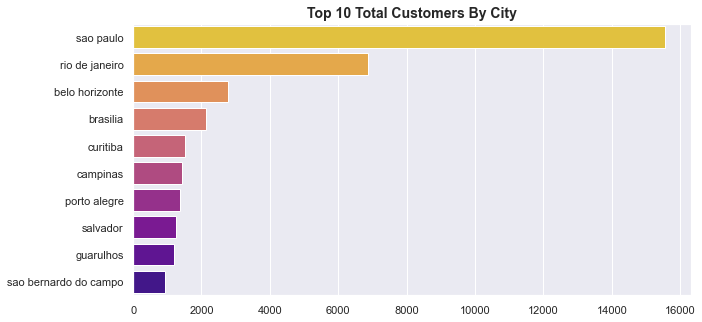

In [18]:
# Plotting Total Customers by city
plt.figure(figsize=(10,5))
top10_city = df_explore.groupby('customer_city')['customer_unique_id'].count().sort_values(ascending=False)[:10]
sns.barplot(x=top10_city.values, y=top10_city.index, palette='plasma_r')
plt.title("Top 10 Total Customers By City", fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

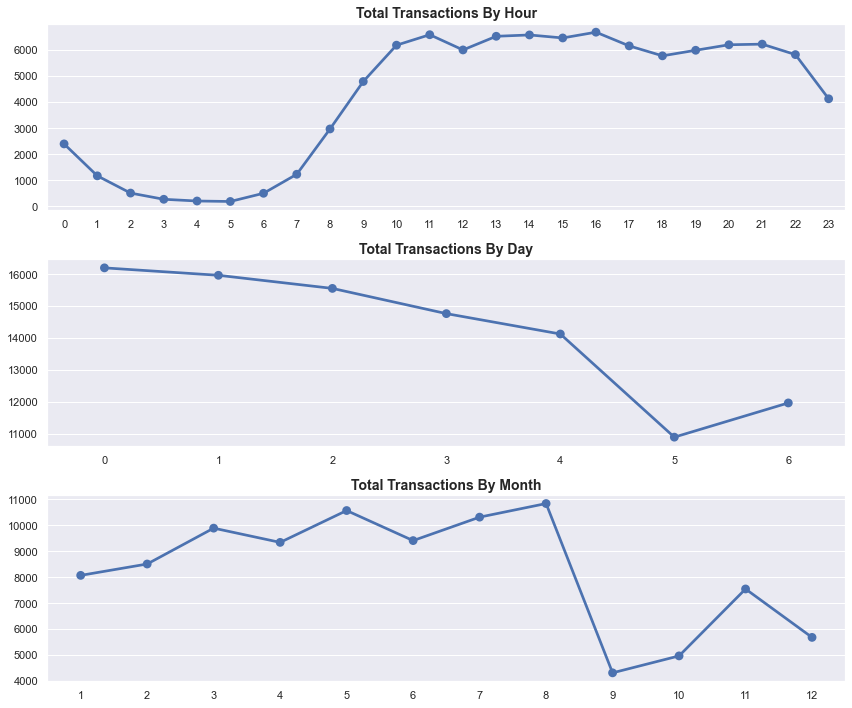

In [19]:
# Create new column from order_purchase_timestamp
df_explore['hour'] = df_explore['order_purchase_timestamp'].dt.hour
df_explore['day'] = df_explore['order_purchase_timestamp'].dt.dayofweek
df_explore['month'] = df_explore['order_purchase_timestamp'].dt.month

# Plotting Total Transactions by time purchase
fig, axes = plt.subplots(3, figsize=(12,10))
for col, ax in zip(df_explore.columns[-3:], axes):
    transactions = df_explore.groupby(col)['order_id'].count()
    sns.pointplot(x=transactions.index, y=transactions.values, ax=ax)
    ax.set_title("Total Transactions By "+col.capitalize(), fontsize=14, fontweight='bold')
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

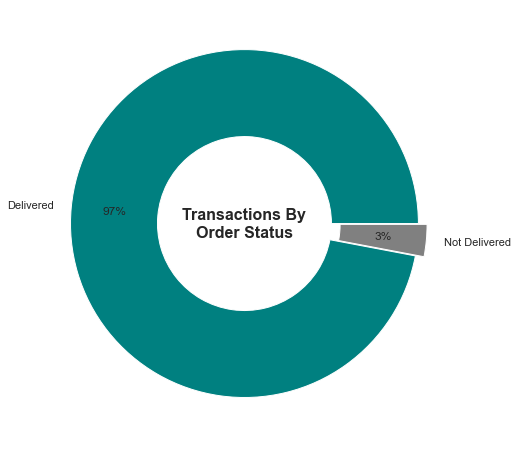

In [20]:
# Plotting distribution order status
status = df_explore['order_status'].value_counts()

# Labelling order status
stat_labs = ['Delivered', 'Not Delivered']
stat_vals = [status[0], status[1:].sum()]
stat_clrs = ['teal', 'grey']

plt.figure(figsize=(8,8))
plt.pie(stat_vals, labels=stat_labs, autopct='%.0f%%', pctdistance=0.75,
        explode=(0.05,0), colors=stat_clrs, wedgeprops=dict(width=0.5))
plt.text(-0.05, 0., 'Transactions By\nOrder Status', fontsize=16, fontweight='bold',
         horizontalalignment='center', verticalalignment='center')
plt.show()

Berdasarkan hasil eksplorasi dari data transaksi pelanggan dapat disimpulkan bahwa:
- Total pelanggan terbanyak berasal dari kota Sao Paulo diikuti Rio de Jainero di peringkat kedua.
- Pelanggan biasanya melakukan transaksi pada jam 10 pagi hingga jam 11 malam.
- Pelanggan lebih banyak bertransaksi saat weekday daripada weekend.
- Pelanggan menurun pada bulan September hingga Desember.
- Masih banyak transaksi yang melebihi batas estimasi pengiriman barang ke pelanggan yakni sekitar 45%.

## 4. RFM Modelling

In [23]:
# Selecting feature
feature_cols = ['customer_unique_id', 'order_id', 'order_status',
                'order_purchase_timestamp', 'order_item_id', 'price']

# Filtering data by order_status = delivered
df_feature_filtered = customer_orders_new[customer_orders_new['order_status']=='delivered'][feature_cols]
# Add new column total_purchase
df_feature_filtered['total_purchase'] = df_feature_filtered['order_item_id'] * df_feature_filtered['price']
# View new first five rows
df_feature_filtered.head()

,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_item_id,price,total_purchase
72951,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,1.0,129.90,129.90
28013,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,1.0,18.90,18.90
46554,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,1.0,69.00,69.00
65101,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,1.0,25.99,25.99
92571,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,1.0,180.00,180.00


In [24]:
# View info filtered table
df_feature_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 72951 to 95385
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        96478 non-null  object        
 1   order_id                  96478 non-null  object        
 2   order_status              96478 non-null  object        
 3   order_purchase_timestamp  96478 non-null  datetime64[ns]
 4   order_item_id             96478 non-null  float64       
 5   price                     96478 non-null  float64       
 6   total_purchase            96478 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 5.9+ MB


In [25]:
from datetime import timedelta

def RFM_Features(df, custID, orderDate, orderID, sales):
    ''' Create the Recency, Frequency, and Monetary features from the data '''
    # Final date in the data + 1 to create latest date
    latest_date = df[orderDate].max() + timedelta(1)
    
    # RFM feature creation
    RFMScores = df.groupby(custID).agg({orderDate: lambda x: (latest_date - x.max()).days, 
                                        orderID: lambda x: len(x), 
                                        sales: lambda x: sum(x)})
    
    # Converting invoiceDate to int since this contains number of days
    RFMScores[orderDate] = RFMScores[orderDate].astype(int)
    
    # Renaming column names to Recency, Frequency and Monetary
    RFMScores.rename(columns={orderDate: 'Recency', 
                              orderID: 'Frequency', 
                              sales: 'Monetary'}, inplace=True)
    
    return RFMScores.reset_index()

In [26]:
RFM = RFM_Features(df=df_feature_filtered, custID="customer_unique_id", 
                   orderDate="order_purchase_timestamp", 
                   orderID= "order_id", sales="total_purchase")
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


            Recency     Frequency      Monetary
count  93358.000000  93358.000000  93358.000000
mean     237.941773      1.033420    141.505269
std      152.591453      0.209097    216.374592
min        1.000000      1.000000      0.850000
25%      114.000000      1.000000     47.500000
50%      219.000000      1.000000     89.190000
75%      346.000000      1.000000    153.675000
max      714.000000     15.000000  13440.000000


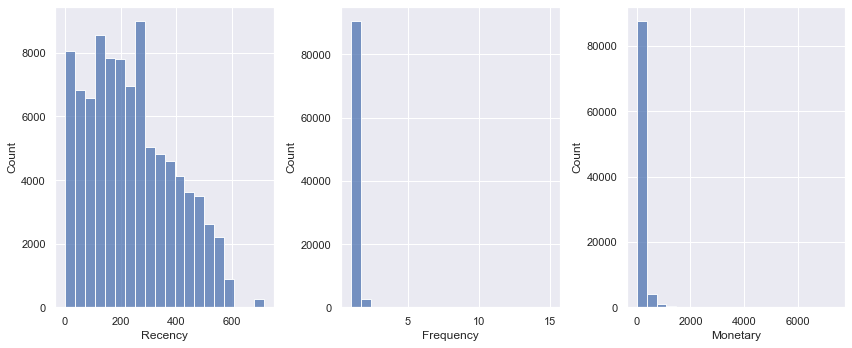

In [29]:
# Descriptive Stats
print(RFM.describe())

# Distributions of Recency, Frequency, and Monetary features
# Here we will filter out the extreme values in the Frequency and Monetary columns to avoid the skewness the distribution
fig, ax = plt.subplots(1,3, figsize=(12,5))

sns.histplot(RFM.Recency, bins=20, ax=ax[0])
sns.histplot(RFM[RFM['Frequency']<1000]['Frequency'], bins=20, ax=ax[1])
sns.histplot(RFM[RFM['Monetary']<10000]['Monetary'], bins=20, ax=ax[2])
plt.tight_layout()
plt.show()

In [30]:
# Creating quantiles 
Quantiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.50, 0.75])
Quantiles = Quantiles.to_dict()
Quantiles

{'Recency': {0.25: 114.0, 0.5: 219.0, 0.75: 346.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 47.5, 0.5: 89.19, 0.75: 153.67499999999998}}

In [31]:
# Creating RFM ranks
def RFMRanking(x, var, q_dict):
    ''' Ranking the Recency, Frequency, and Monetary features based on quantile values '''
    
    # checking if the feature to rank is Recency
    if var == 'Recency':
        if x <= q_dict[var][0.25]:
            return 4
        elif (x > q_dict[var][0.25]) & (x <= q_dict[var][0.5]):
            return 3
        elif (x > q_dict[var][0.5]) & (x <= q_dict[var][0.75]):
            return 2
        else:
            return 1
    
    # checking if the feature to rank is Frequency and Monetary
    if var in ('Frequency','Monetary'):
        if x <= q_dict[var][0.25]:
            return 1
        elif (x > q_dict[var][0.25]) & (x <= q_dict[var][0.5]):
            return 2
        elif (x > q_dict[var][0.5]) & (x <= q_dict[var][0.75]):
            return 3
        else:
            return 4

In [32]:
RFM['R'] = RFM['Recency'].apply(lambda x: RFMRanking(x, 'Recency', Quantiles))
RFM['F'] = RFM['Frequency'].apply(lambda x: RFMRanking(x, 'Frequency', Quantiles))
RFM['M'] = RFM['Monetary'].apply(lambda x: RFMRanking(x, 'Monetary', Quantiles))
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,4


In [42]:
RFM['Group'] = RFM['R'].apply(str) + RFM['F'].apply(str) + RFM['M'].apply(str)
RFM['Group'].value_counts()[:10]

111    5969
212    5929
311    5845
313    5843
411    5842
112    5804
413    5777
412    5622
312    5614
213    5605
Name: Group, dtype: int64

In [43]:
RFM["Score"] = RFM[['R', 'F', 'M']].sum(axis=1)
loyalty = ['Bronze', 'Silver', 'Gold', 'Platinum']
RFM['Loyalty_Level'] = pd.qcut(RFM['Score'], q=4, labels= loyalty)
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,3,413,8,Platinum
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1,311,5,Bronze
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112,4,Bronze
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211,4,Bronze
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,4,214,7,Gold


In [44]:
RFM.groupby('Loyalty_Level')[['Recency', 'Frequency', 'Monetary', 'Score']].median()

,Recency,Frequency,Monetary,Score
Loyalty_Level,,,,
Bronze,345,1,47.000,4
Silver,217,1,87.900,6
Gold,164,1,116.915,7
Platinum,94,1,184.000,8


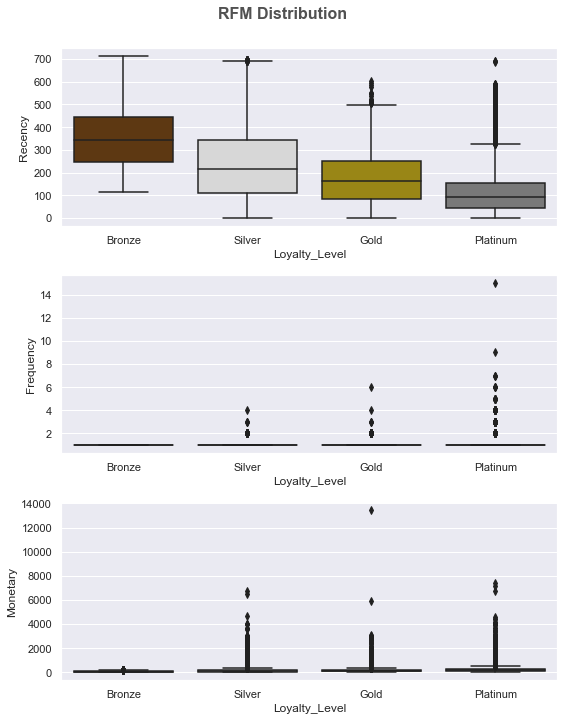

In [45]:
rfm_cols = ['Recency', 'Frequency', 'Monetary']
plt.figure(figsize=(8, 10))
plt.suptitle('RFM Distribution', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(rfm_cols)):
    plt.subplot(3, 1, i+1)
    sns.boxplot(data=RFM, x='Loyalty_Level', y=rfm_cols[i], palette=colors)
    plt.tight_layout()

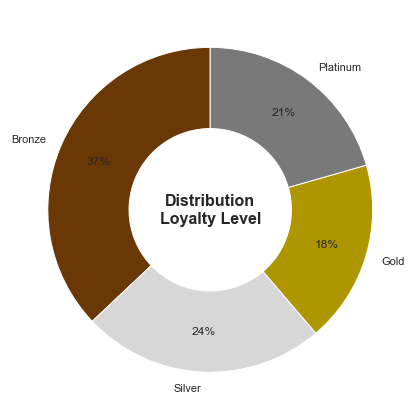

In [48]:
levels = RFM['Loyalty_Level'].value_counts().reindex(loyalty).index
values = RFM['Loyalty_Level'].value_counts().reindex(loyalty).values
colors = ['#6A3805', '#D7D7D7', '#AF9500', '#797979']

plt.figure(figsize=(6,6))
plt.pie(values, labels=levels, autopct='%.0f%%', pctdistance=0.75,
        startangle=90, wedgeprops=dict(width=0.5), colors=colors)
plt.text(0., 0., 'Distribution\nLoyalty Level', fontsize=16, fontweight='bold',
         horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig('loyalty.png')
plt.show()